In [1]:
import numpy as np
import yfinance as yf
from scipy.stats import norm
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2022, 2, 4)
stocks = ['VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA', 'PETR4.SA', 'MGLU3.SA']

## Download dos dados

In [3]:
data = {}

for stock in stocks:
    ticker = yf.download(stock, start_date, end_date)
    data[stock] = ticker['Adj Close']
stock_data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

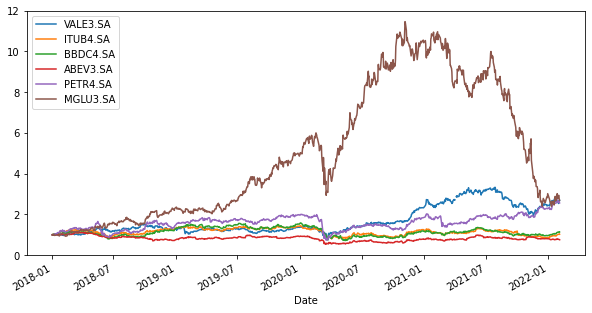

In [4]:
(stock_data / stock_data.iloc[0]).plot(figsize=(10,5))

## Cálculo dos retornos

In [5]:
returns = {}

for stock in stocks:
    returns[stock] = np.log(stock_data[stock] / stock_data[stock].shift(1))

returns = pd.DataFrame(returns)
returns = returns[1:]

returns

,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA,MGLU3.SA
Date,,,,,,
2018-01-03,-0.006011,0.006813,0.004536,0.002303,0.009023,-0.012691
2018-01-04,0.004091,0.020610,0.016274,-0.005535,0.001795,0.023727
2018-01-05,0.015490,0.002879,0.005648,0.003694,0.005959,-0.019902
2018-01-08,0.021984,-0.003322,-0.000281,-0.001845,0.011813,0.000127
2018-01-09,-0.003708,-0.010929,-0.009339,-0.002774,0.000000,-0.024336
...,...,...,...,...,...,...
2022-01-28,-0.009872,0.012176,0.014260,-0.030995,-0.040355,-0.082238
2022-01-31,-0.033918,0.021549,0.008811,0.002676,-0.005856,0.054146
2022-02-01,0.053449,0.006994,0.003503,-0.008048,0.019894,-0.001425


## Cálculo do Valor em Risco

In [6]:
# em relação ao investimento
S = 1e4 # 10 mil
# intervalo de confiança
c = 0.95
# tempo
n = 1 # amanhã

In [7]:
var = {}

for stock in stocks:
    mu = np.mean(returns[stock])
    sigma = np.std(returns[stock])
    var[stock] = S * (mu * n - sigma * np.sqrt(n) * norm.ppf(1 - c))

In [8]:
tt = pd.DataFrame(var.items(), columns=['stock', 'var'])
tt.index = tt['stock']
tt.drop(['stock'], axis =1)

,var
stock,
VALE3.SA,441.469059
ITUB4.SA,368.832157
BBDC4.SA,407.212959
ABEV3.SA,333.536692
PETR4.SA,541.901232
MGLU3.SA,591.862817


<AxesSubplot:xlabel='stock'>

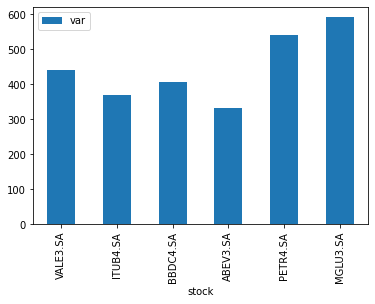

In [9]:
tt.plot.bar()

In [78]:
# para um dia não perderemos mais do que 426.71$ se investirmos 10 mil. considerando o risco amanhã